In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [98]:
data = load_iris()
data.target[[10, 25, 50]]
#array([0, 0, 1])
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [99]:
x= load_iris(as_frame=True)
y = x.frame
y

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [100]:
y.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [101]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [102]:
A = x.data
B = x.target
X_train, X_test, y_train, y_test = train_test_split(A,B,test_size=0.2,random_state=42)

In [103]:
m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [104]:
m.score(X_test, y_test)

1.0

In [105]:
predictions = m.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [106]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# *************************************************************************************************

In [107]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf = RandomForestClassifier(n_estimators=5, random_state=2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

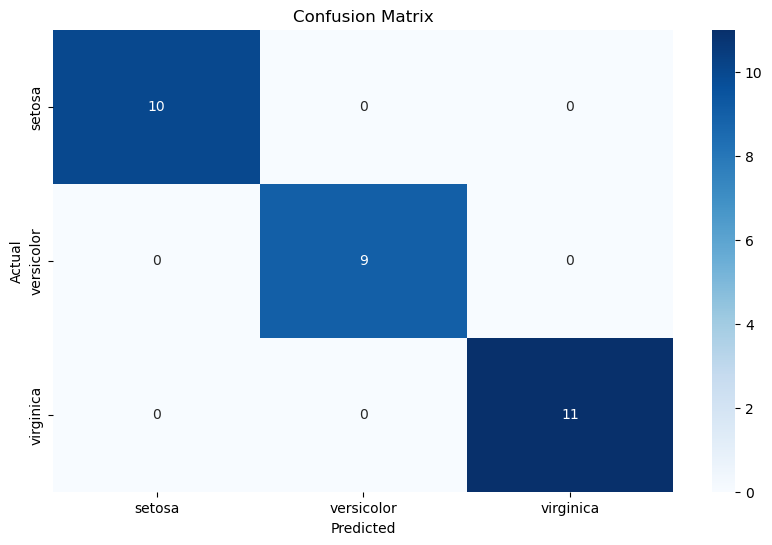

In [108]:
#confusion_matrix

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

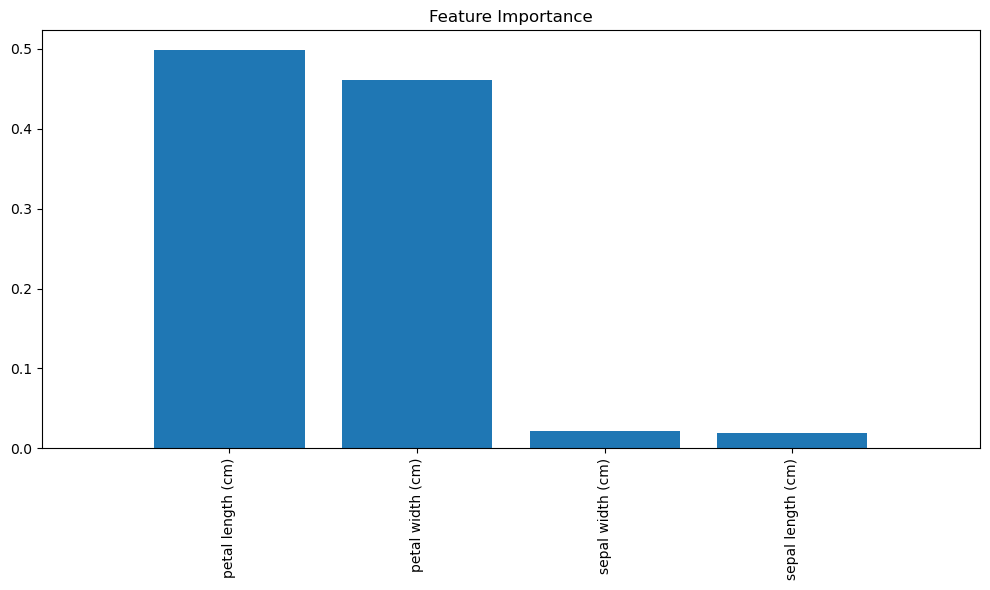

In [109]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances) [::-1]
feature_names = load_iris().feature_names
sorted_feature_names = [feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar (range(X_train.shape[1]), importances [indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [110]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [111]:
bag2 = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7), n_estimators=100, random_state=42)
bag2.fit(X_train,y_train)
y_pred = bag2.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [112]:
bag3 = BaggingClassifier(estimator=LogisticRegression(max_iter=100), n_estimators=100, random_state=42)
bag3.fit(X_train,y_train)
y_pred = bag3.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\G5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\G5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

1.0

In [113]:
x,y=load_iris(return_X_y=True)
n_samples=x.shape[0]


In [114]:
m = 5
N = n_samples

models=[]
prediction=[]
for i in range(m):
    idx=np.random.choice(range(n_samples),size=N,replace=True)
    x_subset=x[idx]
    y_subset=y[idx]
    model=DecisionTreeClassifier()
    model.fit(x_subset,y_subset)
    models.append(model)

preds=model.predict(X_test)
prediction.append(preds)

predictions=np.array(prediction)
predictions.shape



C:\Users\G5\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


(1, 30)

In [115]:
from scipy.stats import mode
final_predes=mode(predictions,axis=0)[0].flatten()
final_predes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [116]:
accuracy_score(y_test,final_predes)

1.0

In [117]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [118]:
gbr = GradientBoostingClassifier(max_depth=3,n_estimators=100, learning_rate=1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
r2_score(y_test,y_pred_gbr)

1.0

In [119]:
#AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC

abd = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=1,estimator=DecisionTreeClassifier(max_depth=13) )
abd.fit(X_train, y_train)
y_pred_abd = abd.predict(X_test)
accuracy_score(y_test,y_pred_abd)

C:\Users\G5\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.0

In [131]:
svc = SVC( kernel='linear', probability=True)
abc = AdaBoostClassifier(n_estimators=50, estimator=svc,learning_rate=1, random_state=1)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
accuracy_score(y_test,y_pred_abc)

C:\Users\G5\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.0